In [6]:
from pinn import PINN
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU, Dense, Input

In [23]:
class SpringPINN(PINN):
    def __init__(self, x0, **kwargs):
        super(SpringPINN, self).__init__(x0, lambda t, x: self.spring(t), **kwargs)

    def spring(self, t):
        return tf.cos(2.*np.pi*t)

    def spring_ode(self, t, x):
        return tf.cos(2.*np.pi*t)

    def plot(self,):
        sol = solve_ivp(self.spring_ode, y0=[1.0], t_span=(0,1.), max_step=0.01, method='RK45')

        fig = plt.figure(figsize=[10, 10])
        ax = fig.gca()
        l1, = ax.plot(sol.t, sol.y[0], label='Spring')
        l1.set_label("RK45")
        l2, = ax.plot(t.numpy(), self(t))
        l2.set_label("NN")
        if not self.x is None:
            l3 = ax.scatter(x.numpy(), y.numpy()[:,0])
            l3.set_label("Observations")
        ax.legend()

In [19]:
model = SpringPINN([1.0])
model.add(Input(1))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64))
model.add(Dense(1))

In [21]:
t = tf.constant(np.linspace(0.,1.,5000), shape=(5000,1), dtype=tf.float32)
model.compile(optimizer="Adam", loss="mse")
model.fit(t, epochs=100)

Epoch 1/100
157/157 [==============================] - 0s 641us/step - loss: 0.5132
Epoch 2/100
157/157 [==============================] - 0s 646us/step - loss: 0.5093
Epoch 3/100
157/157 [==============================] - 0s 643us/step - loss: 0.4993
Epoch 4/100
157/157 [==============================] - 0s 652us/step - loss: 0.5012
Epoch 5/100
157/157 [==============================] - 0s 637us/step - loss: 0.4974
Epoch 6/100
157/157 [==============================] - 0s 673us/step - loss: 0.4937
Epoch 7/100
157/157 [==============================] - 0s 645us/step - loss: 0.4806
Epoch 8/100
157/157 [==============================] - 0s 640us/step - loss: 0.4584
Epoch 9/100
157/157 [==============================] - 0s 655us/step - loss: 0.3567
Epoch 10/100
157/157 [==============================] - 0s 651us/step - loss: 0.1404
Epoch 11/100
157/157 [==============================] - 0s 658us/step - loss: 0.0376
Epoch 12/100
157/157 [==============================] - 0s 642us/step - lo

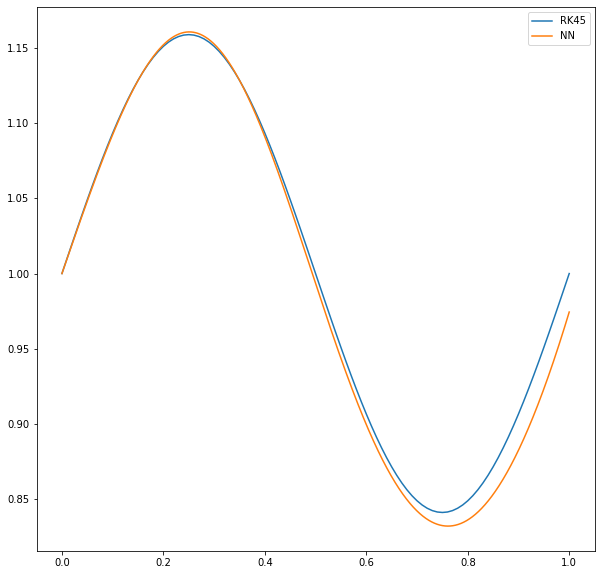

In [22]:
model.plot()

In [24]:
t = tf.constant(np.linspace(0.,1.,5000), shape=(5000,1), dtype=tf.float32)
x = tf.constant([0.2,0.43,0.65,0.9], shape=(4,1))
y = tf.constant([[1.15], [1.05], [0.9], [0.85]], shape=(4,1))

model = SpringPINN([1.0], observations=(x,y), l=0.5)
model.add(Input(1))
model.add(Dense(128, activation="tanh"))
model.add(Dense(64))
model.add(Dense(1))

In [25]:
model.compile(optimizer="Adam", loss="mse")
model.fit(t, epochs=100)

Epoch 1/100
157/157 [==============================] - 0s 773us/step - loss: 0.2612
Epoch 2/100
157/157 [==============================] - 0s 730us/step - loss: 0.2602
Epoch 3/100
157/157 [==============================] - 0s 732us/step - loss: 0.2579
Epoch 4/100
157/157 [==============================] - 0s 713us/step - loss: 0.2586
Epoch 5/100
157/157 [==============================] - 0s 720us/step - loss: 0.2600
Epoch 6/100
157/157 [==============================] - 0s 731us/step - loss: 0.2569
Epoch 7/100
157/157 [==============================] - 0s 736us/step - loss: 0.2556
Epoch 8/100
157/157 [==============================] - 0s 743us/step - loss: 0.2543
Epoch 9/100
157/157 [==============================] - 0s 725us/step - loss: 0.2530
Epoch 10/100
157/157 [==============================] - 0s 727us/step - loss: 0.2443
Epoch 11/100
157/157 [==============================] - 0s 730us/step - loss: 0.2166
Epoch 12/100
157/157 [==============================] - 0s 733us/step - lo

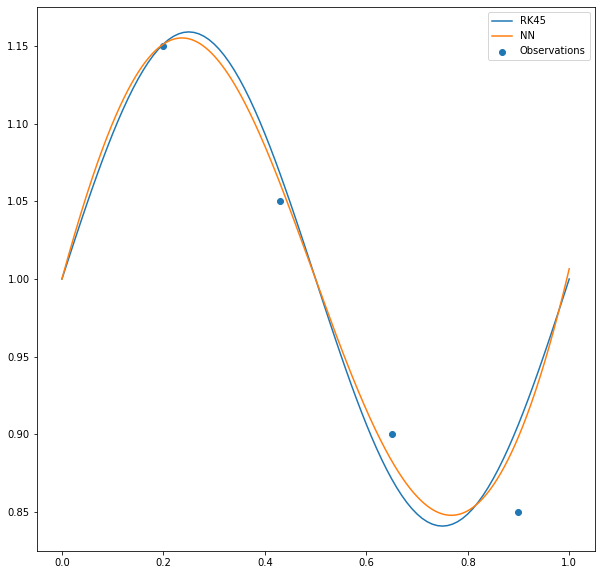

In [27]:
model.plot()